### Niyati Shah

### **Task_1. Simple Linear Regression : Predict the percentage of student based on the no. of study hours.**

This is a simple linear regression task as it involves just two variables.

In [1]:
# Import all libraries that need to implement Linear Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Reading data from url
url= "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
dataset=pd.read_csv(url)
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot our data points to see if we can manually find any relationship between the data. We can create the plot with the following script:

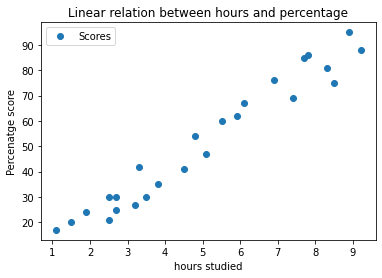

In [3]:
# Plotting the distribution of scores
dataset.plot(x="Hours",y="Scores",style="o")
plt.title("Linear relation between hours and percentage")
plt.xlabel("hours studied")
plt.ylabel("Percenatge score")
# plt.grid(b=True, color='g') => for gridlines
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### **Preparing the data**

In [4]:
# Divide the data into "attributes" (inputs or independent) and "labels" (outputs or dependent).
# df.iloc[:, 2] selects the second column but df.iloc[:, :2] or explicitly df.iloc[:, 0:2] selects the columns until (excluding)
# the second column. It's the same as Python's slices. When you use a negative index, nothing changes. If you say df.iloc[:, -1]
# it means the last column, but df.iloc[:, :-1] means until the last column. before comma  is row, after is column.
x=dataset.iloc[:,:-1].values # until upto last column but not inlcuding last column
y=dataset.iloc[:,1].values # last column

In [5]:
#To check what values it take
print("x_values:" ,x)
print("y_values:" ,y)

x_values: [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
y_values: [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [6]:
# split this data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.20,random_state=1234)

### **Training the Algorithm**

In [7]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression(fit_intercept  = True) #fit_intercept=True by default, false= no interfept will be calculated
regressor.fit(x_train,y_train) # fit(X, y, sample_weight=None),x=training data, y= traget value
print("Training completed")

Training completed


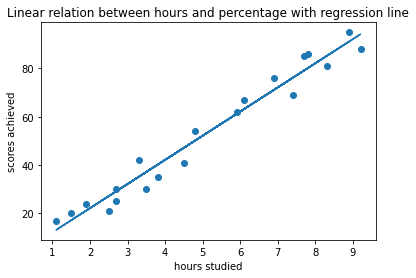

In [8]:
# Plotting the regression line
line=regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x_train,y_train)
plt.plot(x,line) #with x as the array of x-values
plt.title("Linear relation between hours and percentage with regression line")
plt.xlabel("hours studied")
plt.ylabel("scores achieved")
plt.show()

### **Making Predictions**

In [9]:
# Predicting the scores
y_pred=regressor.predict(x_test) #X= array_like Samples. Returns predicted values.

In [12]:
# Comparing Actual vs Predicted
df=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) #tabular data.
df

,Actual,Predicted
0,60,57.155166
1,30,27.122537
2,27,34.130151
3,75,87.187796
4,47,53.150816


In [23]:
# You can also test with your own data
hours=9.25
own_pred = regressor.predict([[hours]]) # array values
#print("No of Hours = {}".format(hours))
print("No of Hours = ", hours)
#print("Predicted Score = {}".format(own_pred))
print("Predicted Score = ", own_pred[0])

No of Hours =  9.25
Predicted Score =  94.69595283072871


### **Evaluating the model**
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error and r2_score.

In [ ]:
from sklearn import metrics

print("Mean absolute error:", metrics.mean_absolute_error(y_pred,y_test))


In [ ]:
# Predicting the Test set results
y_train_pred = regressor.predict(x_train)
y_test_pred = regressor.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
print("Evaluate result for MLA")
print("R-square for Training data: ", r2_score(y_train, y_train_pred))
print("R-square for Testing data: ",r2_score(y_test, y_test_pred))